In [12]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
import learn
import vis
import math
import img_lib

In [13]:
import importlib
importlib.reload(vis)

<module 'vis' from 'c:\\Users\\chian\\Documents\\classes\\ai4m\\vis.py'>

In [14]:
with open("circle/demo0.pkl", "rb") as f:
    raw_traj = pickle.load(f)
trajectory = np.stack(raw_traj["pose"])

t = np.stack(raw_traj["t"])
t = t - t[0]
while len(t) > len(trajectory):
    trajectory = np.concatenate([trajectory, [trajectory[-1]]], axis=0)
while len(t) < len(trajectory):
    trajectory = trajectory[:-1]


c:\Users\chian\Documents\classes\ai4m\vis.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter3D(traj[:, 0], traj[:, 1], traj[:, 2], cmap='Greens');


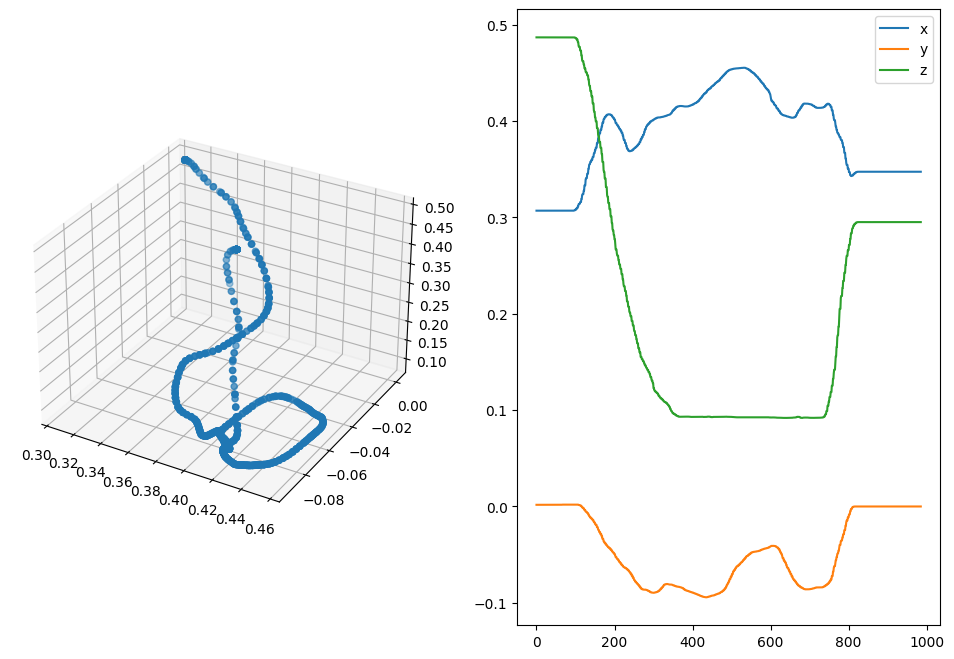

In [15]:
vis.plot_path(trajectory)

In [16]:
def get_pen_down(trajectory, t):
    t = t[trajectory[:,2] < 0.11]
    t -= min(t)
    pen_down = trajectory[trajectory[:,2] < 0.11]
    pen_down[:,2] = 0.1
    return pen_down, t

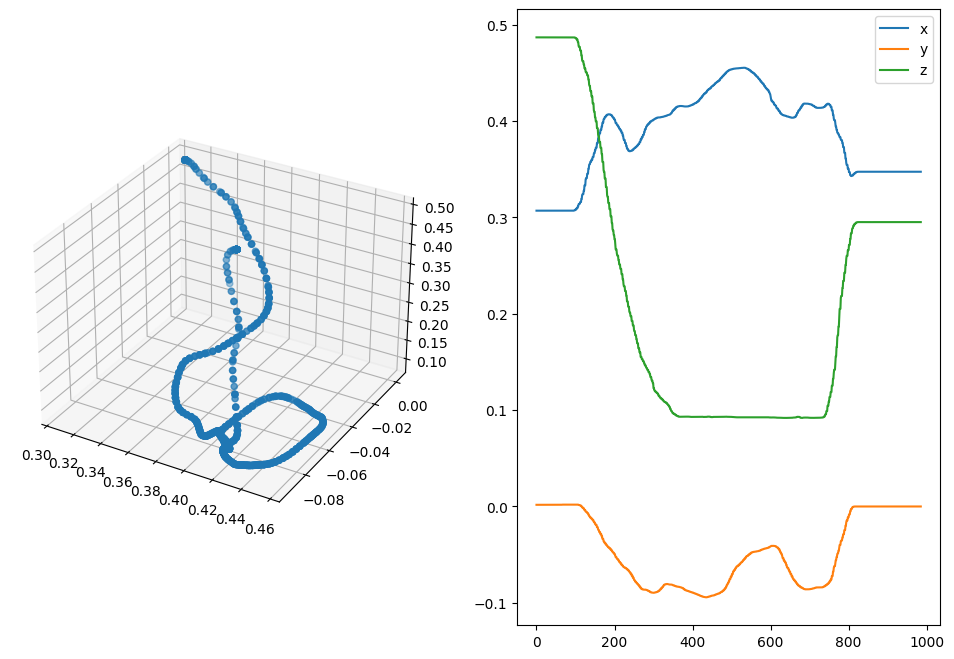

In [17]:
real_trajectory = vis.plot_path(trajectory)

c:\Users\chian\Documents\classes\ai4m\learn.py:35: RuntimeWarning: invalid value encountered in double_scalars
  f.append((qdd * (T ** 2) - K * (g - q) + B * qd * T) / (g - q0))


(700, 2)


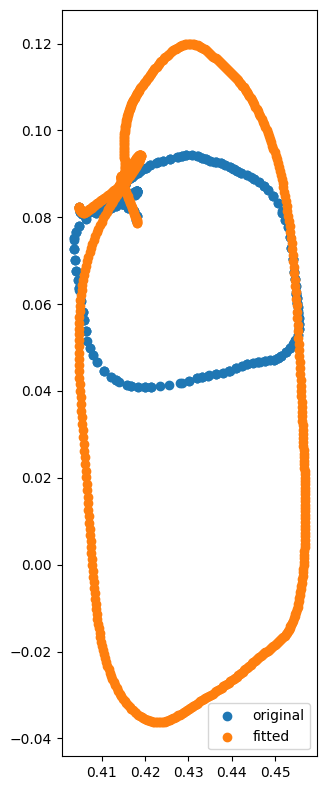

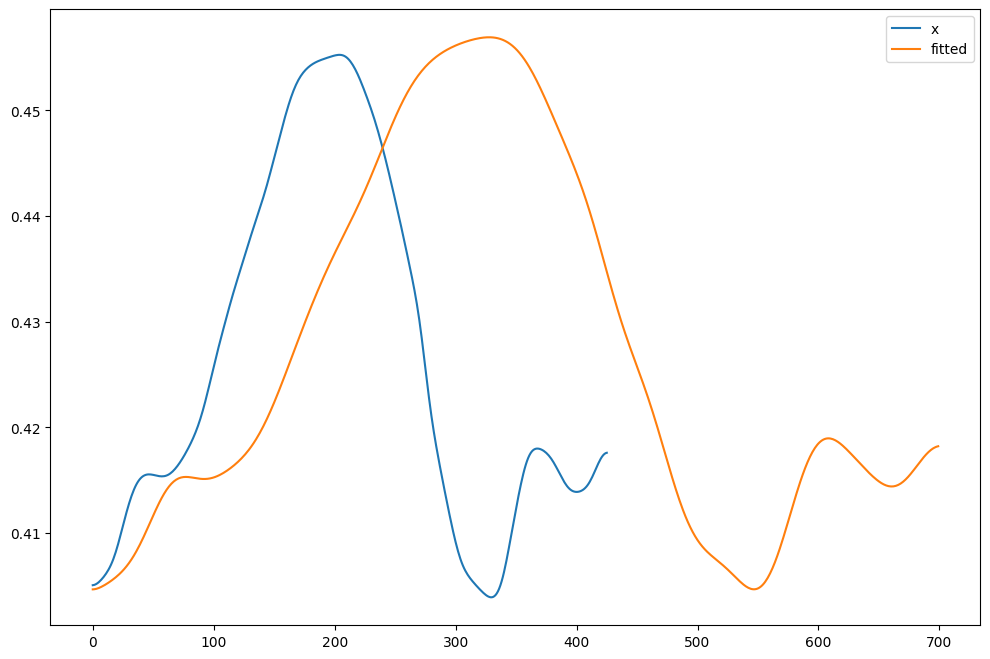

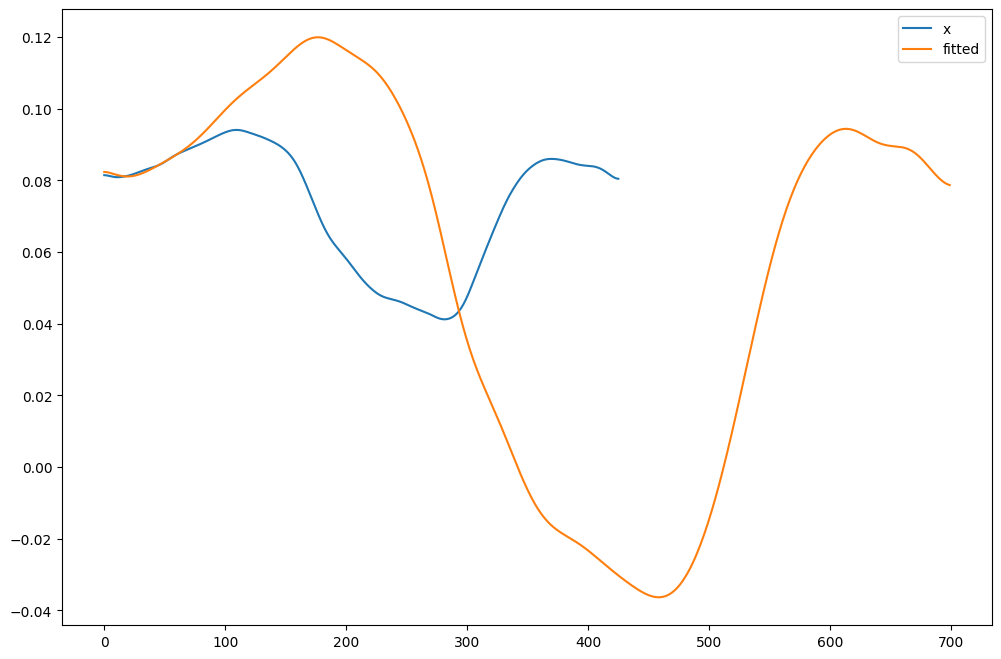

In [18]:
def get_reconstructed(trajectory, t, solver="odeint"):
    n_basis=31
    C = np.linspace(0, 1, n_basis)
    H = [(0.65 * (1./(n_basis-1)) ** 2) for _ in range(len(C))]
    orig, t_down = get_pen_down(trajectory, t)
#     orig = trajectory
#     t_down = t
    alpha=400
    orig[:, 1] = -orig[:, 1]
    weights = learn.learn_weights(orig, t_down, alpha=alpha, beta=alpha/4, C=C, H=H)
    
    t_down = np.linspace(0, 10, 700)
    x = learn.get_pos_from_f(
        t_down, 
        orig[:, 0][0], 
        orig[:, 0][-1], 
        weights["mu"], 
        weights["h"], 
        weights["weights"][0][0], 
        alpha=weights["alpha"], 
        beta=weights["beta"],
        solver=solver,

    )
    y = learn.get_pos_from_f(
        t_down, 
        orig[:, 1][0], 
        orig[:, 1][-1], 
        weights["mu"], 
        weights["h"], 
        weights["weights"][1][0], 
        alpha=weights["alpha"], 
        beta=weights["beta"],
        solver=solver,
    )

    import importlib
    importlib.reload(vis)
    print(np.column_stack([x, y]).shape)
    vis.plot_drawing(orig, np.column_stack([x, y]))
    plt.gca().set_aspect('equal')
    plt.show()
    smoothed = gaussian_filter1d(orig[:, 0], 5)
    vis.plot_f(smoothed, x)
    plt.show()
    smoothed = gaussian_filter1d(orig[:, 1], 5)
    vis.plot_f(smoothed, y)
    plt.show()
get_reconstructed(trajectory, t, solver="odeint")

In [19]:
dmp_weights = {}
for i in img_lib.STROKES[1:]:
    with open(f"{i}/demo0.pkl", "rb") as f:
        raw_traj = pickle.load(f)
    trajectory = np.stack(raw_traj["pose"])

    t = np.stack(raw_traj["t"])
    t = t - t[0]
    while len(t) > len(trajectory):
        trajectory = np.concatenate([trajectory, [trajectory[-1]]], axis=0)
    while len(t) < len(trajectory):
        trajectory = trajectory[:-1]
    
    
    orig, t_down = get_pen_down(trajectory, t)
    alpha=300
    weights = learn.learn_weights(orig, t_down, alpha=alpha, beta=alpha/4)
    dmp_weights[i] = {}
    dmp_weights[i]["orig_x0"] = orig[0]
    dmp_weights[i]["orig_g"] = orig[-1]
    dmp_weights[i]["weights"] = weights
    
# with open(f"strokes/dmp.pkl", "wb") as f:
#     pickle.dump(dmp_weights, f)
    

In [20]:
with open(f"strokes/dmp.pkl", "rb") as f:
    dmp_weights = pickle.load(f)

In [21]:
dmp_weights["circle"]

{'orig_x0': array([ 0.40468371, -0.08235523,  0.1       ]),
 'orig_g': array([ 0.4178951 , -0.07933195,  0.1       ]),
 'weights': {'tau': 0.125,
  'alpha': 300,
  'beta': 75.0,
  'num_dims': 3,
  'num_basis': 31,
  'num_sensors': 1,
  'phi_j': [1.0],
  'mu': [0.0,
   0.03333333333333333,
   0.06666666666666667,
   0.1,
   0.13333333333333333,
   0.16666666666666666,
   0.2,
   0.23333333333333334,
   0.26666666666666666,
   0.3,
   0.3333333333333333,
   0.36666666666666664,
   0.4,
   0.43333333333333335,
   0.4666666666666667,
   0.5,
   0.5333333333333333,
   0.5666666666666667,
   0.6,
   0.6333333333333333,
   0.6666666666666666,
   0.7,
   0.7333333333333333,
   0.7666666666666666,
   0.8,
   0.8333333333333334,
   0.8666666666666667,
   0.9,
   0.9333333333333333,
   0.9666666666666667,
   1.0],
  'h': [0.0007222222222222223,
   0.0007222222222222223,
   0.0007222222222222223,
   0.0007222222222222223,
   0.0007222222222222223,
   0.0007222222222222223,
   0.0007222222222222223